<a href="https://colab.research.google.com/github/NicKostii/UniProjects/blob/main/IDA/Lab_work_3_(IDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабороторна робота №3
Варіант 1   
Тюкалов Ніколай КА-13

# Завдання

**Хiд виконання роботи:**
1. Представити початковi данi графiчно.
2. Розбити данi на навчальний та валiдацiйний набори.

3. Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.

4. Представити моделi графiчно (наприклад вивести частину дерева рi-
шень, побудувати лiнiю регресiї тощо).

5. Виконати прогнози на основi побудованих моделей.
6. Для кожної з моделей оцiнити, чи має мiсце перенавчання.

7. Розрахувати додатковi результати моделей, наприклад, апостерiорнi iмо-
вiрностi або iншi (згiдно з варiантом).

8. В задачах класифiкацiї побудувати границi рiшень графiчно для кожної
з моделей.

9. В задачах класифiкацiї розрахувати для кожної моделi значення наступних критерiїв якостi, окремо на навчальнiй та валiдацiйнiй множинах:

  • матрицю неточностей (confusion matrix),

  • точнiсть (precision),

  • повноту (recall),

  • мiру F1 (F1 score),

  • побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-
  криву, показник AUC.

11. Спробувати виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделей.

12. Зробити висновки про якiсть роботи моделей на дослiджених даних. На
основi критерiїв якостi спробувати обрати найкращу модель.
13. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки
розмiр навчальної множини впливає на якiсть моделi.
14. Кожний варiант мiстить два набори даних. Дослiдити обидва набори за
наведеними вище етапами. Можна обрати власний набiр даних (повiдо-
мивши попередньо про це викладача), наприклад, з цiкавої вам практи-
чної задачi. Для кожного набору спробувати пiдiбрати найкращу модель.

Для отримання максимальної оцiнки потрiбно виконати ВСI етапи Ходу виконання роботи та оформити звiт. Звiтом може бути, наприклад, файл jupyter notebook з кодом програми i текстовими поясненнями вiдповiдно до
Ходу виконання роботи та отриманих цифр.
Звiт має мiстити:
- ПIБ студента, номер групи,
- умову завдання,
- текст програми,

- результати аналiзу кiлькох моделей, пiдбiр гiперпараметрiв, значення метрик якостi моделей, оцiнку впливу розмiру навчальної вибiрки на якiсть моделi.


**2 Варiанти завдань**

Побудувати моделi класифiкацiї на основi методу дерев рiшень, використовуючи sklearn.neural_network.MLPClassifier.
Почати з одношарової моделі нейронної мережі і визначте чи достатньо буде одношарової моделі для опису даних. Реалізуйте динамічне додавання нейронів до скритого шару.
Перевірте скільки нейронів в одношаровій моделі буде достатньо для задовільного розв'язання задачі.

Початковi данi:

**(а)**

    import numpy as np
    np.random.seed(0)
    X = np.random.randn(300,2)
    Y = np.logical_xor(X[:,0] > 0, X[:,1] > 0 )

**(б)**

     dataset_Malicious_and_Benign_Websites.csv

# Необхідні бібліотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc, f1_score
from sklearn.neural_network import MLPClassifier

# Перший dataset

**Препроцесінг**

In [ ]:
np.random.seed(0)
X = np.random.randn(300,2)
Y = np.logical_xor(X[:,0] > 0, X[:,1] > 0 )

In [ ]:
df = pd.DataFrame({'f1': X[:, 0], 'f2': X[:, 1], 'trgt': Y})
df = pd.get_dummies(data= df, columns = ['trgt'], drop_first= True)
df = df.rename(columns={'trgt_True': 'trgt'})
df.head()

,f1,f2,trgt
0,1.764052,0.400157,0
1,0.978738,2.240893,0
2,1.867558,-0.977278,1
3,0.950088,-0.151357,1
4,-0.103219,0.410599,1


***Візуалізація***

<Axes: xlabel='f1', ylabel='f2'>

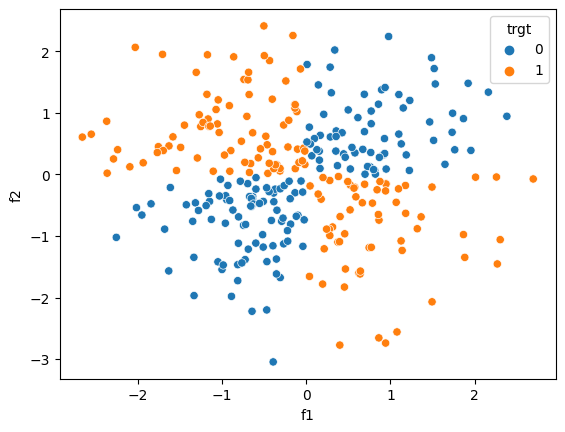

In [ ]:
sns.scatterplot(data=df, x = 'f1', y ='f2', hue = 'trgt')

From plot we can clearly see that classes are separeted in the (0,0) point. NE, SW directions are filled with '0' and NW, SE directions are populated with '1'. So the tree must be really simple and solution boundaries vey distinct and simple too.

**Розбиття на навчальний та валідаційний датасети**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['f1','f2']], df['trgt'], test_size=0.30)

**Побудова дерева**

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, solver = 'lbfgs')
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


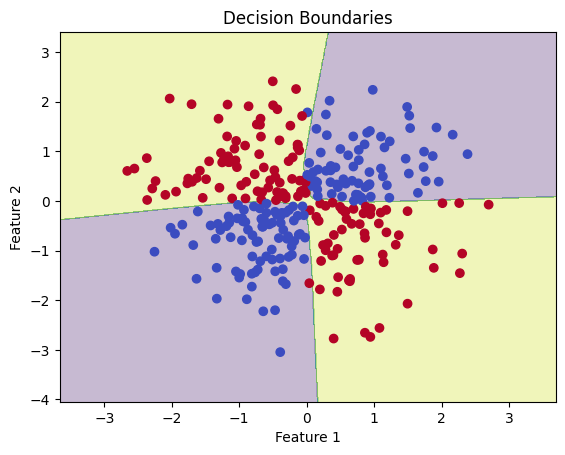

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries')
plt.show()

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.95      0.98      0.96        42

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



In [ ]:
print(confusion_matrix(y_test,predictions))

[[46  2]
 [ 1 41]]


Як ми бачимо точність >= 0.95 для всіх метрік, тобто дуже висока, але потенційно може бути вишче, а дерево може бути простіше, враховуючи природу датасета. Конкретно для цієї моделі, якщо подивтись на границі рішень, то **незначне перенавчання присутнє**.

**PR Curve**

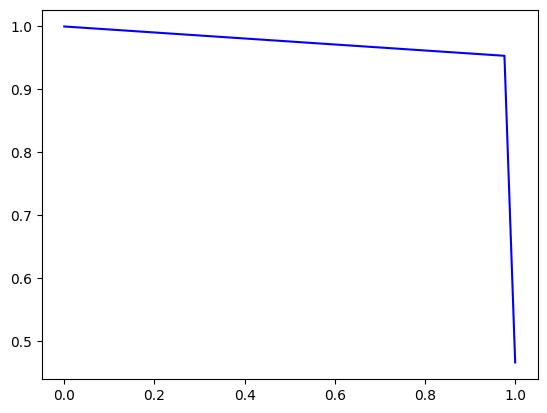

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
plt.plot(recall, precision, color='b', label='PR Curve')


**ROC Curve**

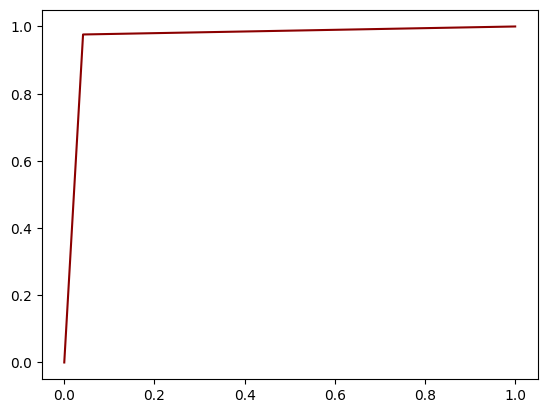

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr, color='darkred',label='ROC curve')

**AUC**

In [ ]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9672619047619049

Як видно з графіків та значення AUC (близьке до 1), модель досить непогана.

**Grid Search**

In [ ]:
params = {'hidden_layer_sizes' : [(20,), (30,), (40,), (50,), (60,), (70,), (80,), (90,), (100,), (110,), (120,), (130,), (140,)],
             'solver' : ['lbfgs'],
             'max_iter'   : range(5, 30, 5)}

mlp2 = MLPClassifier()
bmlp = GridSearchCV(mlp, params, scoring='f1_weighted')
bmlp.fit(X_train, y_train)

In [ ]:
mlp2 = MLPClassifier()

In [ ]:
bmlp.best_params_

{'hidden_layer_sizes': (60,), 'max_iter': 20, 'solver': 'lbfgs'}

In [ ]:
bmlp = bmlp.best_estimator_

In [ ]:
predictions2 = bmlp.predict(X_test)
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.98      0.99        42

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


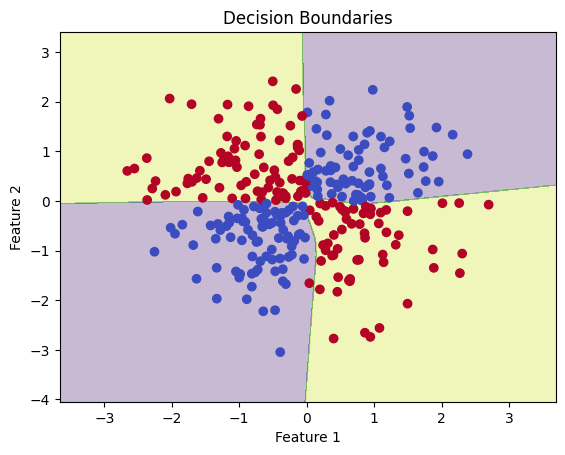

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = bmlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries')
plt.show()

Конкретно в цьому випадку, схоже ми знайшли " майже ідеальну модель". Ми прибрали проблему перенавчання і наша condussion matrix майже ідеальна.

**Розмір навчального та тренувального наборів**

In [ ]:
for i in range(1,10):

    XX_train, XX_test, yy_train, yy_test = train_test_split(df[['f1','f2']], df['trgt'], test_size=(i / 10))
    nbmlp = MLPClassifier(hidden_layer_sizes=(60,), max_iter=20, solver = 'lbfgs')
    nbmlp.fit(XX_train,yy_train)
    predictions3 = nbmlp.predict(XX_test)
    print('iterration №', i)
    print(f1_score( yy_test, predictions3))

iterration № 1

1.0

iterration № 2

0.983050847457627

iterration № 3

0.989247311827957

iterration № 4

0.9739130434782608

iterration № 5

1.0

iterration № 6

0.9878048780487805

iterration № 7

0.9902912621359222

iterration № 8

0.9465020576131686

iterration № 9

0.8663967611336033

Як можна побачити, розподіл та навчульний та валідаційний набори дуже впливає на результативну модель. Разом з використанням найкращих параметрів ми отримали "ідеальну модель".

**Результати**

На датасеті (а) я виконав всі умови лабораторної. Через штучність датасету він є надпростим для алгоритму, тому навіть зі стандартнимим параметрами розв'язок дуже точний. Контроль розміру датасета показав себе дуже ефективним. В результаті я змог знайти "ідеальну модель". Перенавчання в фінальний моделі немає. З цим допомогли параметри розраховані методом Grid Search.

# Другий dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/dataset_Malicious_and_Benign_Websites.csv")

Data preprocesing

In [ ]:
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

<Axes: >

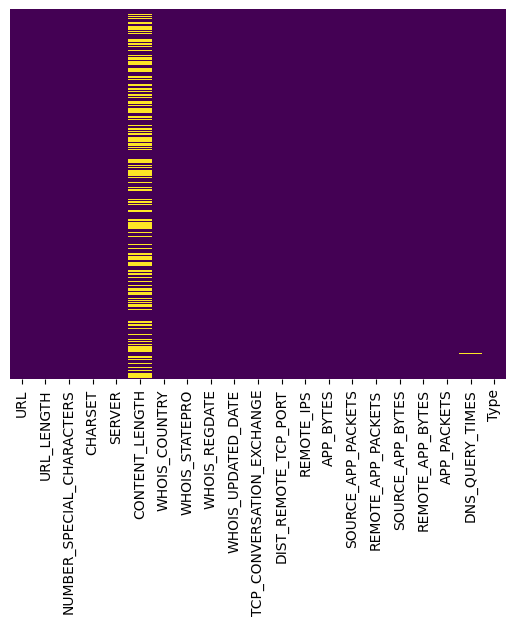

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df['CONTENT_LENGTH'] = df['CONTENT_LENGTH'].fillna(df['CONTENT_LENGTH'].median())

In [ ]:
df.dropna(inplace=True)

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].nunique())

URL
1779
URL_LENGTH
142
NUMBER_SPECIAL_CHARACTERS
31
CHARSET
9
SERVER
239
CONTENT_LENGTH
635
WHOIS_COUNTRY
49
WHOIS_STATEPRO
181
WHOIS_REGDATE
889
WHOIS_UPDATED_DATE
593
TCP_CONVERSATION_EXCHANGE
103
DIST_REMOTE_TCP_PORT
66
REMOTE_IPS
18
APP_BYTES
825
SOURCE_APP_PACKETS
113
REMOTE_APP_PACKETS
116
SOURCE_APP_BYTES
885
REMOTE_APP_BYTES
822
APP_PACKETS
113
DNS_QUERY_TIMES
10
Type
2


In [ ]:
df['CHARSET'].value_counts()

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

In [ ]:
countries = df['CHARSET'].value_counts().head(5)
df['CHARSET'] = df['CHARSET'].apply(lambda x: x if x in countries else 'Other')

In [ ]:
df['WHOIS_STATEPRO'].value_counts().head(5)

CA           372
None         362
NY            75
WA            65
Barcelona     62
Name: WHOIS_STATEPRO, dtype: int64

In [ ]:
countries = df['WHOIS_STATEPRO'].value_counts().head(5)
df['WHOIS_STATEPRO'] = df['WHOIS_STATEPRO'].apply(lambda x: x if x in countries else 'Other')

In [ ]:
df['WHOIS_COUNTRY'].value_counts().head(5)

US      1102
None     306
CA        83
ES        63
AU        35
Name: WHOIS_COUNTRY, dtype: int64

In [ ]:
df[(df['WHOIS_COUNTRY'] == "[u'GB'; u'UK']") |  (df['WHOIS_COUNTRY'] == 'UK') | (df['WHOIS_COUNTRY'] == 'United Kingdom')]['WHOIS_COUNTRY'] = 'GB'

<ipython-input-33-aa2a9879b9ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df['WHOIS_COUNTRY'] == "[u'GB'; u'UK']") |  (df['WHOIS_COUNTRY'] == 'UK') | (df['WHOIS_COUNTRY'] == 'United Kingdom')]['WHOIS_COUNTRY'] = 'GB'


In [ ]:
countries = df['WHOIS_COUNTRY'].value_counts().head(5)
df['WHOIS_COUNTRY'] = df['WHOIS_COUNTRY'].apply(lambda x: x if x in countries else 'Other')

In [ ]:
df['WHOIS_COUNTRY'].value_counts()

US       1102
None      306
Other     190
CA         83
ES         63
AU         35
Name: WHOIS_COUNTRY, dtype: int64

In [ ]:
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [ ]:
df.loc[df['SERVER'].apply(lambda x: "apache" in str(x).lower()),'SERVER'] = 'Apache'
df.loc[df['SERVER'].apply(lambda x: "nginx" in str(x).lower()),'SERVER'] = 'nginx'
df.loc[df['SERVER'].apply(lambda x: "microsoft" in str(x).lower()),'SERVER'] = 'Microsoft'

In [ ]:
countries = df['SERVER'].value_counts().head(5)
df['SERVER'] = df['SERVER'].apply(lambda x: x if x in countries else 'Other')

In [ ]:
df['SERVER'].value_counts()

Apache       642
nginx        436
Other        279
Microsoft    198
None         175
GSE           49
Name: SERVER, dtype: int64

In [ ]:
df = df.drop('URL', axis=1)

In [ ]:
df = df.drop('WHOIS_REGDATE', axis=1)

In [ ]:
df = df.drop('WHOIS_UPDATED_DATE', axis=1)

In [ ]:
df.loc[df['CHARSET'].apply(lambda x: "utf" in str(x).lower()), 'CHARSET'] = 'UTF'
df.loc[df['CHARSET'].apply(lambda x: "iso" in str(x).lower()), 'CHARSET'] = 'ISO'
df.loc[df['CHARSET'].apply(lambda x: "windows" in str(x).lower()), 'CHARSET'] = 'Windows'

In [ ]:
df.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,ISO,nginx,263.0,None,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,UTF,Apache,15087.0,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft,324.0,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO,nginx,162.0,US,Other,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF,None,124140.0,US,Other,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [ ]:
data = pd.get_dummies(data = df, columns = ['CHARSET','SERVER','WHOIS_COUNTRY','WHOIS_STATEPRO'], drop_first= True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1779 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   CONTENT_LENGTH             1779 non-null   float64
 3   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 4   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 5   REMOTE_IPS                 1779 non-null   int64  
 6   APP_BYTES                  1779 non-null   int64  
 7   SOURCE_APP_PACKETS         1779 non-null   int64  
 8   REMOTE_APP_PACKETS         1779 non-null   int64  
 9   SOURCE_APP_BYTES           1779 non-null   int64  
 10  REMOTE_APP_BYTES           1779 non-null   int64  
 11  APP_PACKETS                1779 non-null   int64  
 12  DNS_QUERY_TIMES            1779 non-null   float64
 13  Type                       1779 non-null   int64

**Visualization**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1779 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   CHARSET                    1779 non-null   object 
 3   SERVER                     1779 non-null   object 
 4   CONTENT_LENGTH             1779 non-null   float64
 5   WHOIS_COUNTRY              1779 non-null   object 
 6   WHOIS_STATEPRO             1779 non-null   object 
 7   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 8   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 9   REMOTE_IPS                 1779 non-null   int64  
 10  APP_BYTES                  1779 non-null   int64  
 11  SOURCE_APP_PACKETS         1779 non-null   int64  
 12  REMOTE_APP_PACKETS         1779 non-null   int64  
 13  SOURCE_APP_BYTES           1779 non-null   int64

<Axes: xlabel='Type', ylabel='count'>

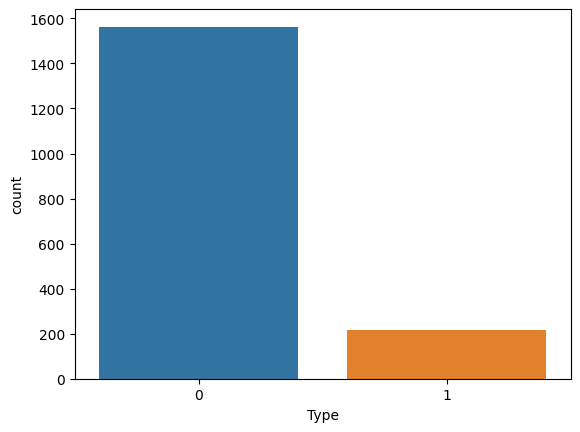

In [ ]:
sns.countplot(data = df, x = 'Type')

<Axes: xlabel='WHOIS_COUNTRY', ylabel='count'>

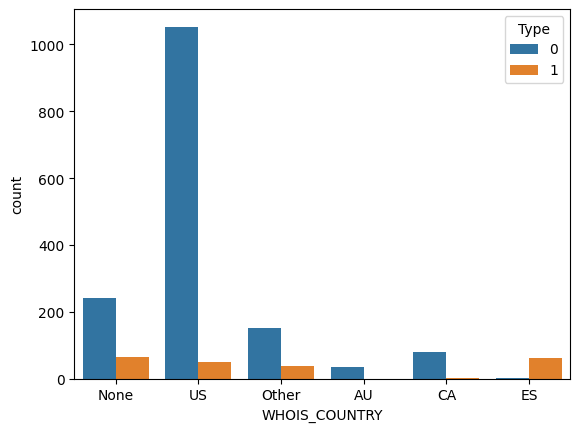

In [ ]:
sns.countplot(data = df, x = 'WHOIS_COUNTRY', hue = 'Type')

<Axes: xlabel='SERVER', ylabel='count'>

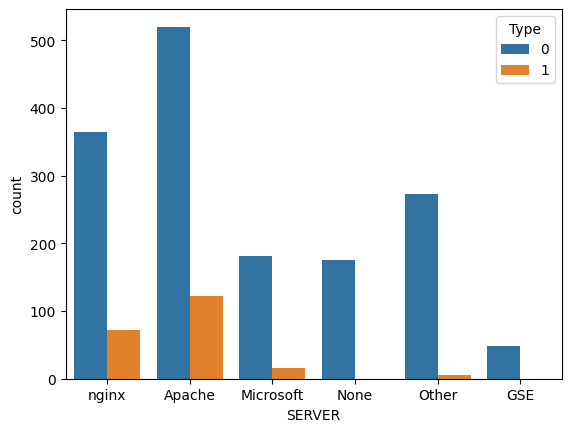

In [ ]:
sns.countplot(data = df, x = 'SERVER', hue = 'Type')

<Axes: xlabel='CHARSET', ylabel='count'>

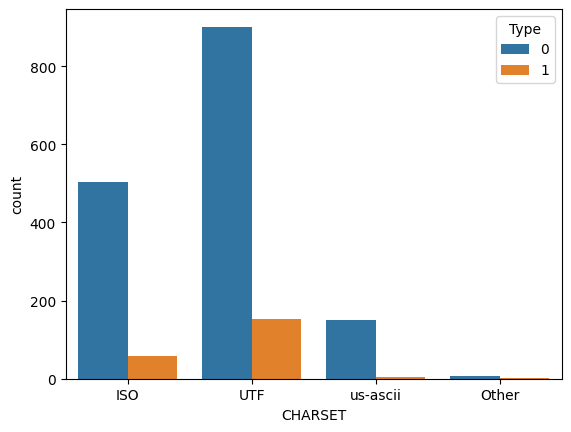

In [ ]:
sns.countplot(data = df, x = 'CHARSET', hue = 'Type')

**Розподіл даних**

Використаємо досвід попереднього датасету та розіб'ємо з коеф. ~0.4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Type', axis=1), data['Type'], test_size=0.4)

**Побудуємо дерево**

In [ ]:
params = {'hidden_layer_sizes' : [(20,20,20,20), (30,30,30,30), (40,40,40,40), (50,50,50,50), (60,60,60,60), (70,70,70,70)],
             'solver' : ['lbfgs','sgd', 'adam'],
             'max_iter'   : range(10, 100, 10)}

mlp = MLPClassifier()
bmlp = GridSearchCV(mlp, params, scoring='f1_weighted')
bmlp.fit(X_train, y_train)

In [ ]:
bmlp.best_params_

{'hidden_layer_sizes': (50, 50, 50, 50), 'max_iter': 60, 'solver': 'adam'}

In [ ]:
bmlp = bmlp.best_estimator_

In [ ]:
predictions = bmlp.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       628
           1       0.33      0.52      0.41        84

    accuracy                           0.82       712
   macro avg       0.63      0.69      0.65       712
weighted avg       0.86      0.82      0.84       712



 Можна помітити проблему з класифікацією класу "1", але це скоріше за все через те, що його не не вистачає в датасеті.

**PR Curve**

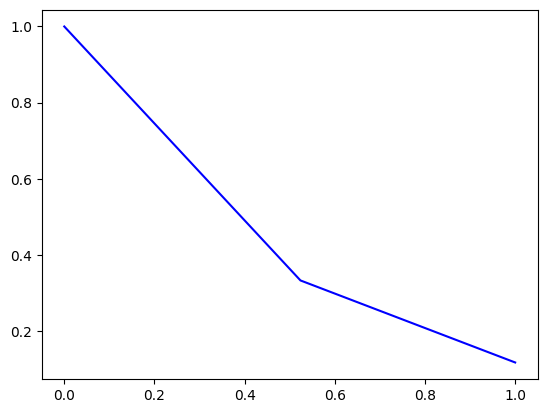

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
plt.plot(recall, precision, color='b', label='PR Curve')

**ROC Curve**

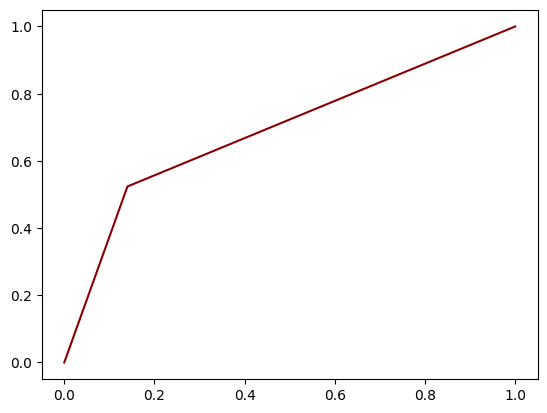

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr, color='darkred',label='ROC curve')

**AUC**

Показник чотиришарової моделі.

In [ ]:
roc_auc = auc(fpr, tpr)
roc_auc

0.691841067637246

Нижче тришарова.

In [ ]:
roc_auc = auc(fpr, tpr)
roc_auc

0.6511601455868972

Нижче показник двошарової моделі. Не супер гарно.

In [ ]:
roc_auc = auc(fpr, tpr)
roc_auc

0.6590081892629662

Нижче залтшок спроби зробити одношарову модель. Вона була не сильно краща за вгадування.

In [ ]:
roc_auc = auc(fpr, tpr)
roc_auc

0.5212765957446809

**Результати**

Ми отримали не зовім погану модель. Можна помітити що площа під RoC кривою збільшується з збільшенням кількості шарів, але досить повільно. На мою думку більш суттєвим покращенням для моделі буде якісна обробка датасету.

# Висновки
В цій роботі я опанував на початковому рівні дерева рішень. Я також обробляв та підготавлював датасет перед обробкою, що є кроком можливо важливішим за сам етап побудови моделі. Перший датасет був штучним і для еього вийшло побудувати "ідеальну модель". Для другого датасету модель вийшла гірше. Точність виявлення "шкідливих сатйів" треба суттєво покращити для реального використання моделі. Частково на мою думку проблема в низький кількості екземплярів "шкідливих сайтів" в датасеті.